In [106]:
data <- read.csv("shortjean.csv",sep=";")

In [113]:
names(data)

[1] "ï..STOREID" "FASHION"    "LEISURE"    "STRETCH"    "ORIGINAL"

In [108]:
data['SALESTOT'] <- NULL
data['pFASHION'] <- NULL
data['pLEISURE'] <- NULL
data['pSTRETCH'] <- NULL
data['pORIGINAL'] <- NULL

In [110]:
data[600,2]

[1] 119000

In [114]:
#normalizar
data.norm<- sapply(data[,2:5],scale)

In [115]:
colnames(data.norm) <- c('z_fashion','z_leisure','z_stretch','z_original')

In [116]:
df <- cbind(data,data.norm)

In [117]:
head(df)

ï..STOREID,FASHION,LEISURE,STRETCH,ORIGINAL,z_fashion,z_leisure,z_stretch,z_original
1,182000,1528000,496000,2203000,2.7513038,-1.1071129,0.2454501,1.2126396
2,129000,2247000,296000,1890000,1.1263485,0.9422545,-0.6993270,0.1392808
3,107000,1652000,267000,2342000,0.4518388,-0.7536754,-0.8363197,1.6893070
4,117000,1744000,419000,2119000,0.7584341,-0.4914476,-0.1182891,0.9245817
5,110000,1736000,755000,1781000,0.5438174,-0.5142500,1.4689364,-0.2345087
6,79000,1637000,613000,2138000,-0.4066282,-0.7964299,0.7981447,0.9897376


Revisar si hay datos faltantes

In [118]:
#check for missing values
sum(is.na(df$FASHION))
sum(is.na(df$STRETCH))
sum(is.na(df$LEISURE))
sum(is.na(df$ORIGINAL))
sum(is.na(df))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

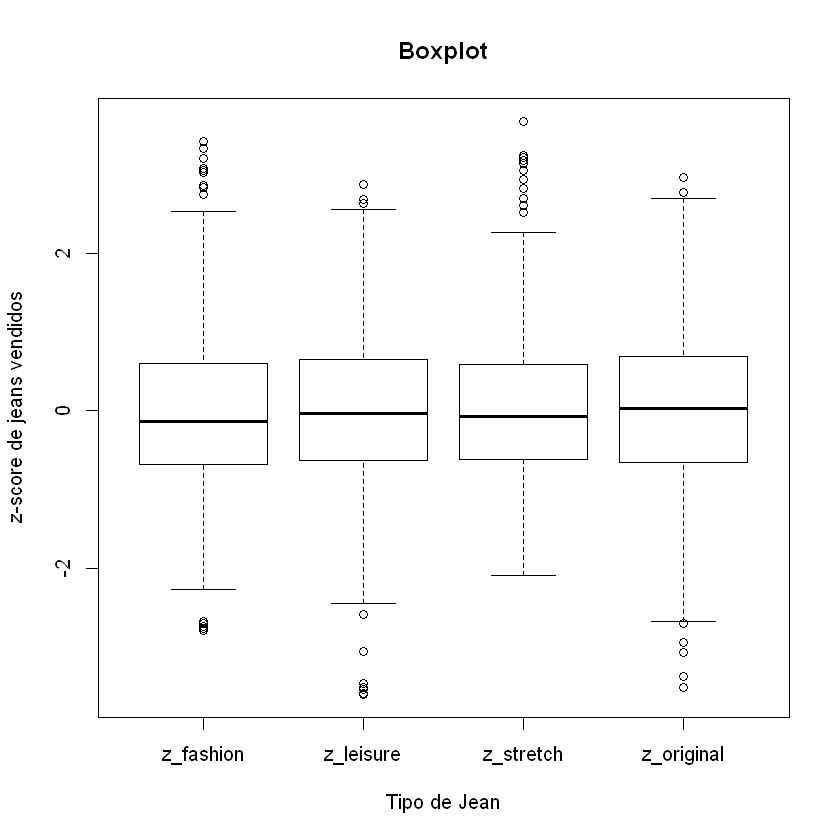

In [120]:
boxplot(df[,6:9], xlab = "Tipo de Jean", ylab = "z-score de jeans vendidos", main = "Boxplot")

In [121]:
# revisar outliers
fashion.outlier <- boxplot.stats(df$z_fashion)$out
leisure.outlier <- boxplot.stats(df$z_leisure)$out
stretch.outlier <- boxplot.stats(df$z_stretch)$out
original.outlier <- boxplot.stats(df$z_original)$out


In [122]:
# crear vector unico para el valor de outlier
fashion.outlier.un <- unique(fashion.outlier)
leisure.outlier.un<- unique(leisure.outlier)
stretch.outlier.un <- unique(stretch.outlier)
original.outlier.un <- unique(original.outlier)

In [123]:
# funcion para remover outliers
outlier_value <- function(x, factor){
  
  v <- vector("numeric", length = 0)
  for (i in 1:length(x)){
    for (j in 1:length(factor)){
      if (x[i] == factor[j]){
        v<- c(v,i)}
      
    }
  }
  return(v)
}

In [124]:
# encontrar las filas con valores outliers
ve1 <- outlier_value(df$z_fashion,fashion.outlier.un)
ve2 <- outlier_value(df$z_leisure,leisure.outlier.un)
ve3 <- outlier_value(df$z_stretch,stretch.outlier.un)
ve4 <- outlier_value(df$z_original,original.outlier.un)

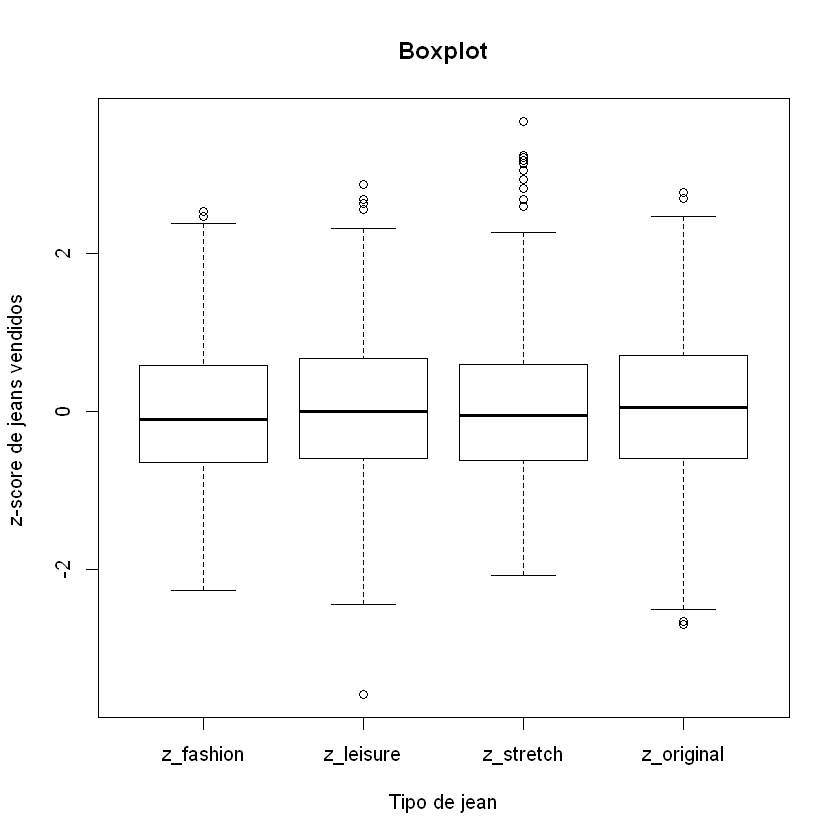

In [125]:
# remover filas con valores outliers
df <- df[-ve1,]
df <- df[-ve2,]
df <- df[-ve3,]
df <- df[-ve4,]              
boxplot(df[,6:9], xlab = "Tipo de jean", ylab = "z-score de jeans vendidos ", main = "Boxplot")

In [126]:
set.seed(42)
row.names(df) <- df[,1]

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


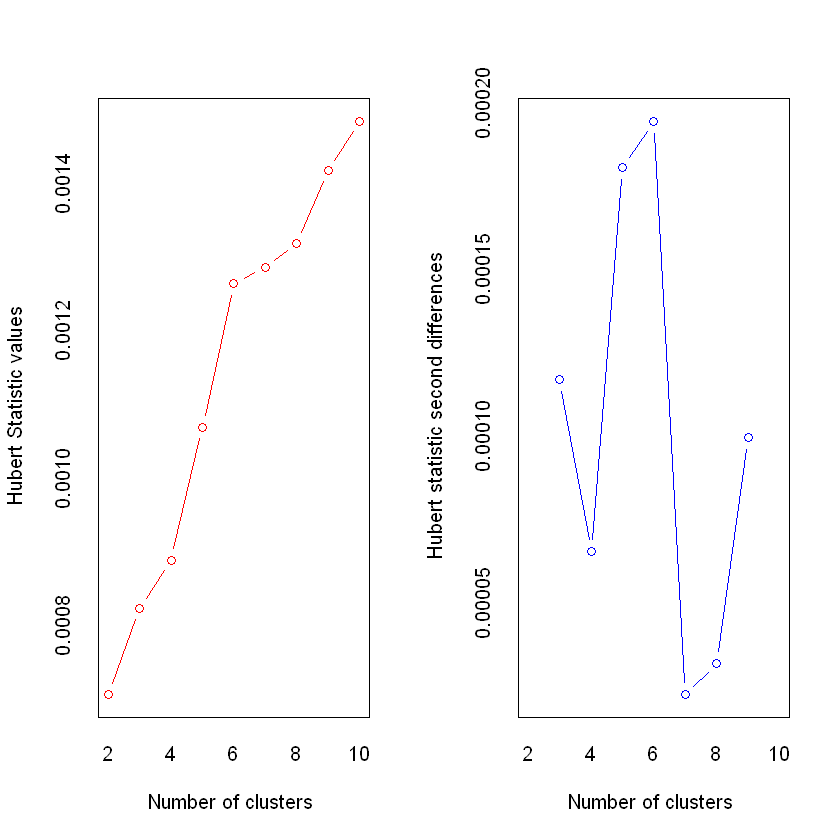

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 5 proposed 2 as the best number of clusters 
* 2 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 5 proposed 5 as the best number of clusters 
* 5 proposed 6 as the best number of clusters 
* 2 proposed 9 as the best number of clusters 
* 2 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 



 0  1  2  3  4  5  6  9 10 
 2  1  5  2  2  5  5  2  2 

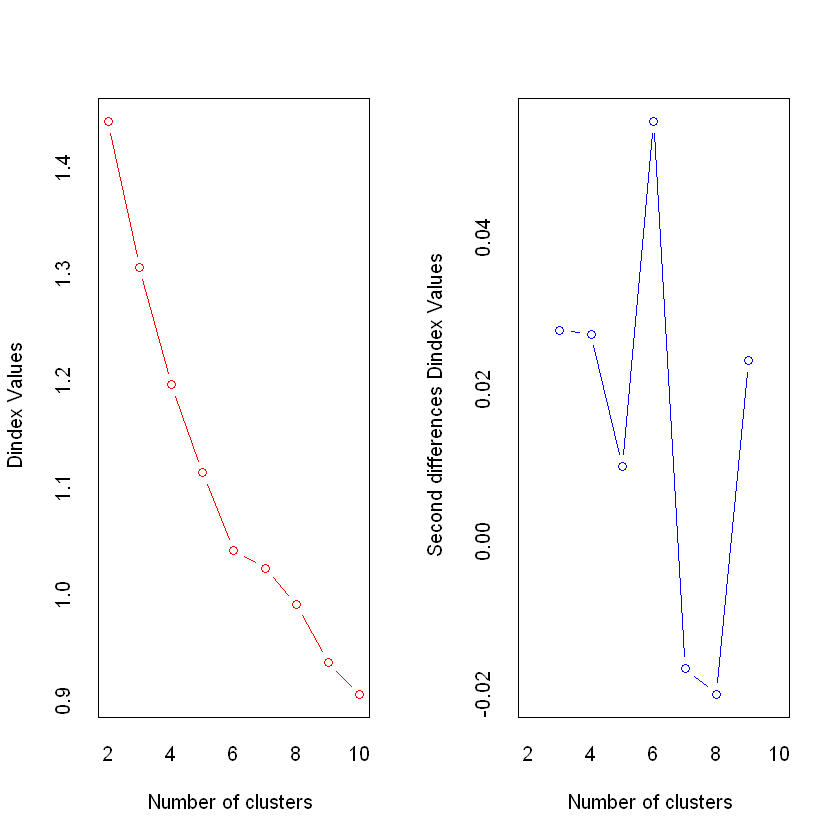

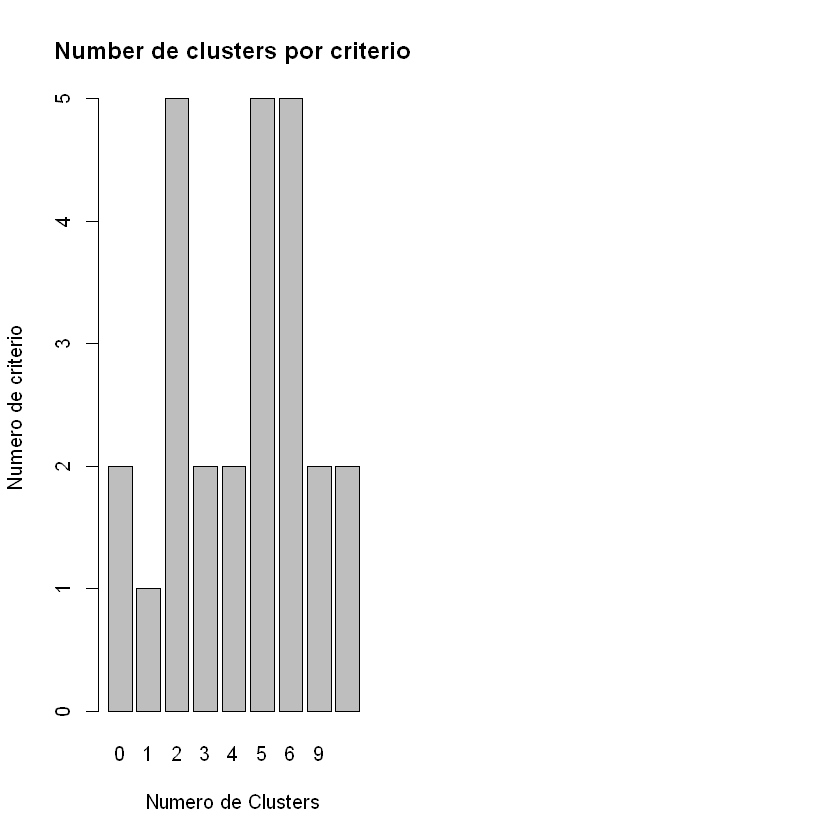

In [128]:
library(NbClust)
devAskNewPage(ask=TRUE)
nc <- NbClust(df[,6:9], min.nc=2, max.nc=10, method="kmeans")
table(nc$Best.n[1,])
barplot(table(nc$Best.n[1,]), xlab="Numero de Clusters", ylab="Numero de criterio", main="Number de clusters por criterio")

In [136]:
#function to calculate the withing sum of sqaures for a range of number of clusters
wssplot <- function(data, nc=10, seed=1234) {
  wss <- (nrow(df)-1)*sum(apply(df[,6:9], 2, var)) 
  for (i in 2:10) {
    set.seed(1234) 
    wss[i] <- sum(kmeans(data, centers=i)$withinss)
  } 
  plot(1:10, wss, type="b",main = "Optimo numero de clusters" , xlab="Numero de Clusters", ylab="suma de cuadrados de grupos")
}

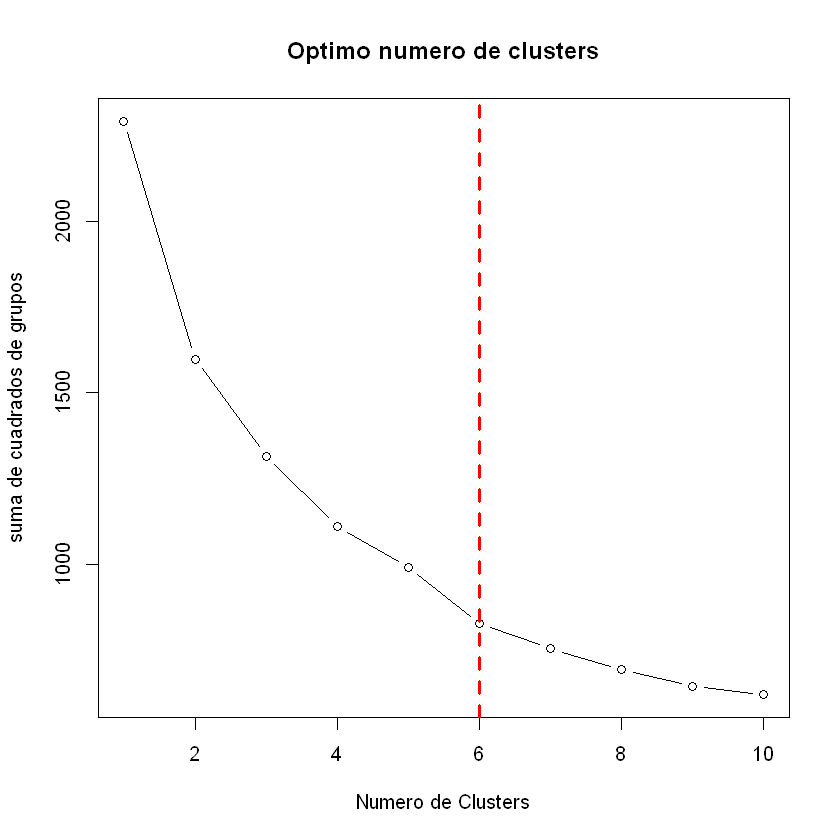

In [137]:
wssplot(df[,6:9])
abline(v=6, col="red", lty=2, lwd=3)


In [135]:
fit.km <- kmeans(df[,6:9], 6, nstart=25)
fit.km


K-means clustering with 6 clusters of sizes 100, 112, 41, 157, 135, 98

Cluster means:
    z_fashion  z_leisure   z_stretch  z_original
1 -0.23248203 -1.0045020  1.54721121  0.44102149
2  1.26705385  0.1334049 -0.04329743  0.08122828
3 -0.38045541 -0.7322634 -1.92868943 -0.89961818
4 -0.55387205  0.4613341  0.08080612 -0.20768622
5 -0.02486021 -0.5490026 -0.23285208  1.17608624
6 -0.06061345  1.5076324 -0.43560889 -1.18941809

Clustering vector:
  2   3   4   5   6   7   8   9  10  11  12  13  15  17  18  19  20  21  22  23 
  2   5   5   1   1   6   6   5   5   3   5   4   6   2   5   4   2   6   4   4 
 24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43 
  2   4   1   4   1   5   5   4   5   5   5   4   6   1   3   5   2   1   1   2 
 44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  64  66 
  1   4   1   3   2   4   6   4   4   5   4   2   2   4   6   1   1   6   6   2 
 68  69  72  73  74  75  78  79  80  81  82  83  84  85  86  87 